# Xgboost

In [1]:
import xgboost as xgb
print(xgb.__version__) # xgboost 버전

0.90


In [2]:
from xgboost import plot_importance
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('./dataset/m_train_data.csv')
test = pd.read_csv('./dataset/m_test_data.csv')

In [4]:
train.head()

,body_length,body_width,body_height,wavyfin_length,wavyfin_width,wavyfin_height,pipe1_length,pipe1_width,pipe1_height,pipe2_length,pipe2_width,pipe2_height,flange1_length,flange1_width,flange1_height,flange2_length,flange2_width,flange2_height,op60_test
0,199.996,100.002,50.001,100.000,49.997,59.997,30.000,50.003,29.996,30.000,49.996,29.999,30.002,80.000,40.003,30.001,79.998,39.999,1
1,200.002,100.000,49.998,99.999,50.002,60.000,29.999,49.994,29.999,30.007,50.000,29.998,30.000,79.997,40.002,30.000,79.995,40.000,0
2,199.998,100.000,49.998,100.003,50.003,59.998,29.995,50.002,30.000,30.003,50.005,30.001,30.000,80.001,39.993,29.997,79.999,39.995,0
3,200.002,100.000,50.000,100.000,50.003,60.000,30.001,49.995,29.998,30.002,50.000,29.997,30.002,80.002,40.001,29.998,79.997,39.998,0
4,200.001,100.001,49.999,100.003,49.997,59.996,30.000,50.001,29.996,30.002,50.004,29.997,29.999,80.004,40.000,29.997,79.998,40.000,0


In [5]:
test.head()

,body_length,body_width,body_height,wavyfin_length,wavyfin_width,wavyfin_height,pipe1_length,pipe1_width,pipe1_height,pipe2_length,pipe2_width,pipe2_height,flange1_length,flange1_width,flange1_height,flange2_length,flange2_width,flange2_height,op60_test
0,199.997,99.999,50.003,100.000,50.005,60.003,29.996,50.004,30.002,29.998,50.002,30.003,30.001,80.001,40.007,30.002,79.999,40.004,0
1,199.999,100.001,50.002,99.996,50.000,60.004,29.998,50.004,29.995,30.000,50.000,30.002,30.003,80.001,39.999,29.998,79.999,39.999,0
2,199.999,100.001,50.002,100.001,50.001,60.003,29.997,50.001,30.003,30.001,50.002,30.001,30.002,80.003,39.998,29.999,80.001,39.997,0
3,200.002,99.996,49.999,100.001,49.998,60.000,30.000,50.006,30.001,30.001,49.999,29.999,29.996,80.002,39.998,30.002,80.002,39.999,0
4,199.999,100.003,50.003,100.000,50.001,60.000,30.000,49.998,30.002,30.001,50.000,29.999,30.004,79.998,39.999,30.003,80.002,40.000,0


In [6]:
X_train = train.drop(['op60_test'], axis = 1) # train dataset에서 op_60test 값을 삭제

In [7]:
X_train.head()

,body_length,body_width,body_height,wavyfin_length,wavyfin_width,wavyfin_height,pipe1_length,pipe1_width,pipe1_height,pipe2_length,pipe2_width,pipe2_height,flange1_length,flange1_width,flange1_height,flange2_length,flange2_width,flange2_height
0,199.996,100.002,50.001,100.000,49.997,59.997,30.000,50.003,29.996,30.000,49.996,29.999,30.002,80.000,40.003,30.001,79.998,39.999
1,200.002,100.000,49.998,99.999,50.002,60.000,29.999,49.994,29.999,30.007,50.000,29.998,30.000,79.997,40.002,30.000,79.995,40.000
2,199.998,100.000,49.998,100.003,50.003,59.998,29.995,50.002,30.000,30.003,50.005,30.001,30.000,80.001,39.993,29.997,79.999,39.995
3,200.002,100.000,50.000,100.000,50.003,60.000,30.001,49.995,29.998,30.002,50.000,29.997,30.002,80.002,40.001,29.998,79.997,39.998
4,200.001,100.001,49.999,100.003,49.997,59.996,30.000,50.001,29.996,30.002,50.004,29.997,29.999,80.004,40.000,29.997,79.998,40.000


In [8]:
Y_train = train['op60_test'] # train dataset에서 op_60test 값을 라벨값으로 선정
Y_train.head()

0    1
1    0
2    0
3    0
4    0
Name: op60_test, dtype: int64

In [9]:
X_test = test.drop(['op60_test'], axis = 1) # test dataset에서 op_60test 값을 삭제
X_test.head()

,body_length,body_width,body_height,wavyfin_length,wavyfin_width,wavyfin_height,pipe1_length,pipe1_width,pipe1_height,pipe2_length,pipe2_width,pipe2_height,flange1_length,flange1_width,flange1_height,flange2_length,flange2_width,flange2_height
0,199.997,99.999,50.003,100.000,50.005,60.003,29.996,50.004,30.002,29.998,50.002,30.003,30.001,80.001,40.007,30.002,79.999,40.004
1,199.999,100.001,50.002,99.996,50.000,60.004,29.998,50.004,29.995,30.000,50.000,30.002,30.003,80.001,39.999,29.998,79.999,39.999
2,199.999,100.001,50.002,100.001,50.001,60.003,29.997,50.001,30.003,30.001,50.002,30.001,30.002,80.003,39.998,29.999,80.001,39.997
3,200.002,99.996,49.999,100.001,49.998,60.000,30.000,50.006,30.001,30.001,49.999,29.999,29.996,80.002,39.998,30.002,80.002,39.999
4,199.999,100.003,50.003,100.000,50.001,60.000,30.000,49.998,30.002,30.001,50.000,29.999,30.004,79.998,39.999,30.003,80.002,40.000


In [10]:
Y_test = test['op60_test'] # test dataset에서 op_60test 값을 라벨값으로 선정
Y_test.head()

0    0
1    0
2    0
3    0
4    0
Name: op60_test, dtype: int64

In [11]:
dtrain = xgb.DMatrix(data = X_train, label = Y_train) # train, test 값을 DMatrix로 변환
dtest = xgb.DMatrix(data = X_test, label = Y_test)

In [12]:
wlist = [(dtrain, 'train'), (dtest, 'eval')] # 조기중단을 사용하기 위한 리스트

In [13]:
params = {'max_depth' : 20,
         'eta': 0.001,
         'objective' : 'binary:logistic',
          'eval_metric' : 'error',
         'early_stopping':200
         } # eta는 learning rate, 데이터가 0 or 1 이진분류 이기에 binart logistic
num_rounds = 1000 # 1000번의 학습 실행

In [14]:
xgb_model = xgb.train(params = params, dtrain = dtrain, num_boost_round = num_rounds,
                     early_stopping_rounds = 1000, evals = wlist)

[0]	train-error:0.0425	eval-error:0.059
Multiple eval metrics have been passed: 'eval-error' will be used for early stopping.

Will train until eval-error hasn't improved in 1000 rounds.
[1]	train-error:0.042	eval-error:0.059
[2]	train-error:0.042625	eval-error:0.0565
[3]	train-error:0.04275	eval-error:0.057
[4]	train-error:0.042625	eval-error:0.0565
[5]	train-error:0.04275	eval-error:0.056
[6]	train-error:0.042625	eval-error:0.057
[7]	train-error:0.043	eval-error:0.058
[8]	train-error:0.042875	eval-error:0.058
[9]	train-error:0.043	eval-error:0.058
[10]	train-error:0.04275	eval-error:0.058
[11]	train-error:0.043125	eval-error:0.058
[12]	train-error:0.043	eval-error:0.058
[13]	train-error:0.043125	eval-error:0.058
[14]	train-error:0.043	eval-error:0.058
[15]	train-error:0.043125	eval-error:0.058
[16]	train-error:0.043125	eval-error:0.058
[17]	train-error:0.043125	eval-error:0.058
[18]	train-error:0.043125	eval-error:0.058
[19]	train-error:0.043125	eval-error:0.058
[20]	train-error:0.04

[187]	train-error:0.042875	eval-error:0.0555
[188]	train-error:0.042875	eval-error:0.0555
[189]	train-error:0.042875	eval-error:0.0555
[190]	train-error:0.042875	eval-error:0.0555
[191]	train-error:0.042875	eval-error:0.0555
[192]	train-error:0.042875	eval-error:0.0555
[193]	train-error:0.042875	eval-error:0.0555
[194]	train-error:0.042875	eval-error:0.0555
[195]	train-error:0.042875	eval-error:0.0555
[196]	train-error:0.042875	eval-error:0.0555
[197]	train-error:0.042875	eval-error:0.0555
[198]	train-error:0.042875	eval-error:0.0555
[199]	train-error:0.042625	eval-error:0.0555
[200]	train-error:0.042625	eval-error:0.0555
[201]	train-error:0.042625	eval-error:0.0555
[202]	train-error:0.0425	eval-error:0.0555
[203]	train-error:0.0425	eval-error:0.0555
[204]	train-error:0.0425	eval-error:0.0555
[205]	train-error:0.0425	eval-error:0.0555
[206]	train-error:0.042375	eval-error:0.0555
[207]	train-error:0.04225	eval-error:0.056
[208]	train-error:0.04225	eval-error:0.056
[209]	train-error:0.04

[376]	train-error:0.03925	eval-error:0.0515
[377]	train-error:0.03925	eval-error:0.0515
[378]	train-error:0.03925	eval-error:0.0515
[379]	train-error:0.03925	eval-error:0.0515
[380]	train-error:0.03925	eval-error:0.0515
[381]	train-error:0.03925	eval-error:0.0515
[382]	train-error:0.039125	eval-error:0.0515
[383]	train-error:0.03925	eval-error:0.0515
[384]	train-error:0.039125	eval-error:0.0515
[385]	train-error:0.039	eval-error:0.0515
[386]	train-error:0.039125	eval-error:0.0515
[387]	train-error:0.039	eval-error:0.0515
[388]	train-error:0.039	eval-error:0.0515
[389]	train-error:0.039	eval-error:0.0515
[390]	train-error:0.039	eval-error:0.0515
[391]	train-error:0.039	eval-error:0.0515
[392]	train-error:0.039	eval-error:0.0515
[393]	train-error:0.039	eval-error:0.0515
[394]	train-error:0.039	eval-error:0.0515
[395]	train-error:0.039	eval-error:0.0515
[396]	train-error:0.038875	eval-error:0.051
[397]	train-error:0.039	eval-error:0.051
[398]	train-error:0.039	eval-error:0.051
[399]	train

[566]	train-error:0.036875	eval-error:0.0505
[567]	train-error:0.036875	eval-error:0.0505
[568]	train-error:0.036875	eval-error:0.0505
[569]	train-error:0.036875	eval-error:0.0505
[570]	train-error:0.036875	eval-error:0.0505
[571]	train-error:0.036875	eval-error:0.0505
[572]	train-error:0.036875	eval-error:0.0505
[573]	train-error:0.036875	eval-error:0.0505
[574]	train-error:0.036875	eval-error:0.0505
[575]	train-error:0.036875	eval-error:0.0505
[576]	train-error:0.036875	eval-error:0.0505
[577]	train-error:0.036875	eval-error:0.0505
[578]	train-error:0.036625	eval-error:0.0505
[579]	train-error:0.03675	eval-error:0.0505
[580]	train-error:0.03675	eval-error:0.0505
[581]	train-error:0.036625	eval-error:0.0505
[582]	train-error:0.036625	eval-error:0.0505
[583]	train-error:0.0365	eval-error:0.0505
[584]	train-error:0.0365	eval-error:0.0505
[585]	train-error:0.0365	eval-error:0.0505
[586]	train-error:0.0365	eval-error:0.0505
[587]	train-error:0.0365	eval-error:0.0505
[588]	train-error:0.03

[754]	train-error:0.03375	eval-error:0.047
[755]	train-error:0.03375	eval-error:0.047
[756]	train-error:0.03375	eval-error:0.047
[757]	train-error:0.03375	eval-error:0.047
[758]	train-error:0.03375	eval-error:0.047
[759]	train-error:0.033625	eval-error:0.047
[760]	train-error:0.0335	eval-error:0.047
[761]	train-error:0.033375	eval-error:0.047
[762]	train-error:0.033625	eval-error:0.047
[763]	train-error:0.0335	eval-error:0.047
[764]	train-error:0.033375	eval-error:0.047
[765]	train-error:0.0335	eval-error:0.047
[766]	train-error:0.03325	eval-error:0.047
[767]	train-error:0.03325	eval-error:0.047
[768]	train-error:0.03325	eval-error:0.047
[769]	train-error:0.03325	eval-error:0.047
[770]	train-error:0.03325	eval-error:0.047
[771]	train-error:0.03325	eval-error:0.047
[772]	train-error:0.033375	eval-error:0.047
[773]	train-error:0.033125	eval-error:0.047
[774]	train-error:0.032875	eval-error:0.047
[775]	train-error:0.033	eval-error:0.047
[776]	train-error:0.032875	eval-error:0.047
[777]	tr

[941]	train-error:0.03125	eval-error:0.0465
[942]	train-error:0.03125	eval-error:0.0465
[943]	train-error:0.03125	eval-error:0.0465
[944]	train-error:0.031125	eval-error:0.0465
[945]	train-error:0.031	eval-error:0.046
[946]	train-error:0.031	eval-error:0.046
[947]	train-error:0.031	eval-error:0.046
[948]	train-error:0.031	eval-error:0.046
[949]	train-error:0.031	eval-error:0.046
[950]	train-error:0.031	eval-error:0.046
[951]	train-error:0.031	eval-error:0.046
[952]	train-error:0.031	eval-error:0.046
[953]	train-error:0.031	eval-error:0.046
[954]	train-error:0.03125	eval-error:0.0455
[955]	train-error:0.03125	eval-error:0.0455
[956]	train-error:0.03125	eval-error:0.0455
[957]	train-error:0.03125	eval-error:0.0455
[958]	train-error:0.03125	eval-error:0.0455
[959]	train-error:0.03125	eval-error:0.0455
[960]	train-error:0.03125	eval-error:0.0455
[961]	train-error:0.03125	eval-error:0.0455
[962]	train-error:0.03125	eval-error:0.0455
[963]	train-error:0.03125	eval-error:0.0455
[964]	train-er

In [15]:
pred_probs = xgb_model.predict(dtest) # 예측 결과를 추정하는 확률 값 반환
print(np.round(pred_probs[:10], 3)) 

print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨 ')
preds = [1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 100개만 표시: ', preds[:100])

[0.198 0.216 0.2   0.238 0.2   0.2   0.199 0.197 0.247 0.203]
predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨 
예측값 100개만 표시:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [16]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy , precision ,recall))

In [17]:
get_clf_eval(Y_test, preds)

오차 행렬
[[1876    5]
 [  85   34]]
정확도: 0.9550, 정밀도: 0.8718, 재현율: 0.2857


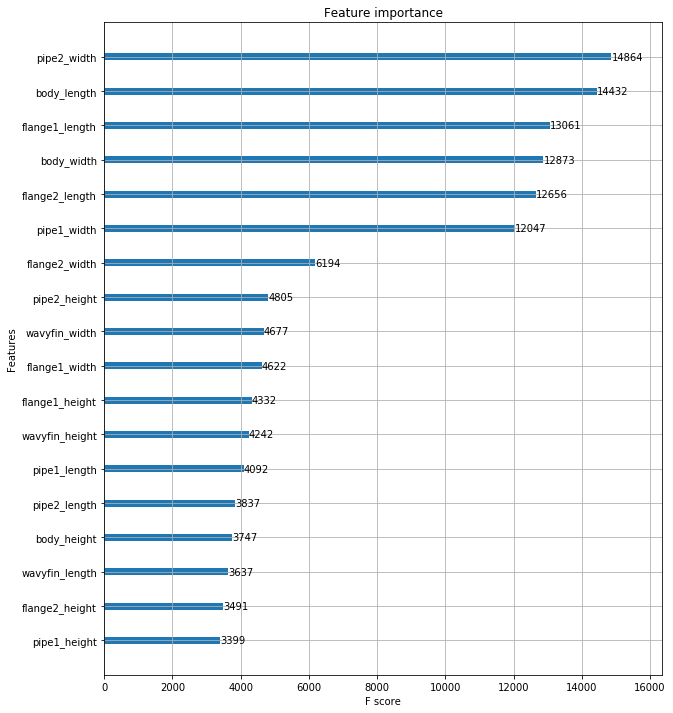

In [18]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10, 12))
plot_importance(xgb_model,ax=ax)